In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#get working directory path
wd = os.getcwd()
#load in training data and labels as dataframe
trainDF = pd.read_csv(wd + '/training.csv')
trainDF.head()

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
0,0,95.33,2893.0,10.68,21.33
1,0,94.41,2038.0,17.13,5.77
2,0,90.48,2183.0,6.61,15.39
3,0,93.04,2279.0,9.33,14.57
4,0,95.17,2384.0,6.99,17.62


In [3]:
#Check for missing values
trainDF.isnull().sum()

InPlay              0
Velo                0
SpinRate            6
HorzBreak           0
InducedVertBreak    0
dtype: int64

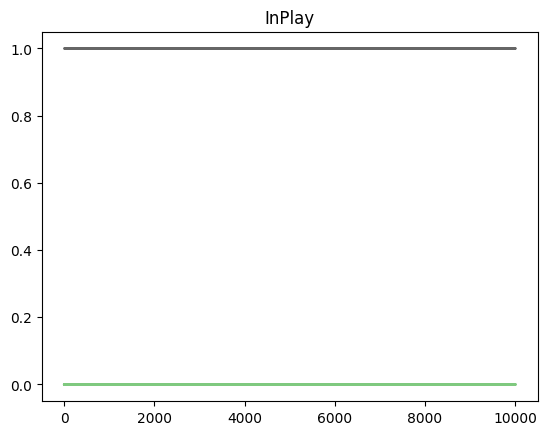

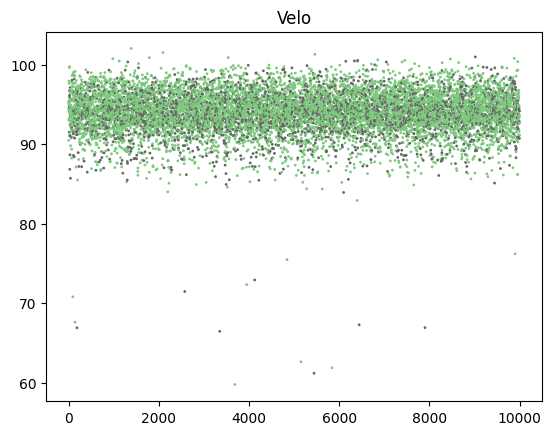

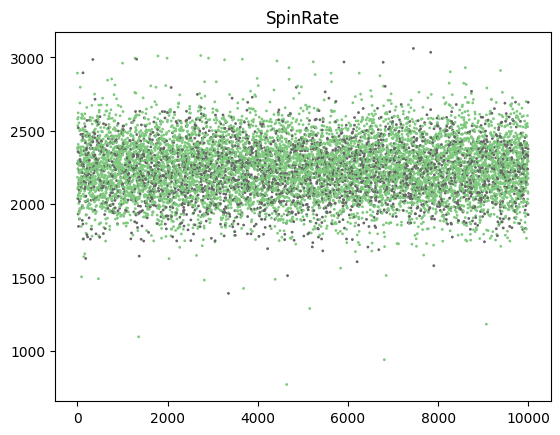

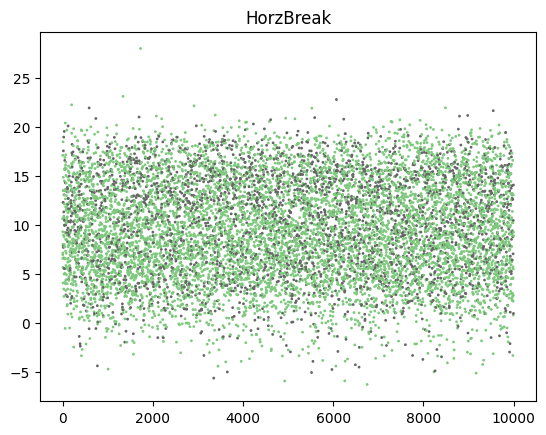

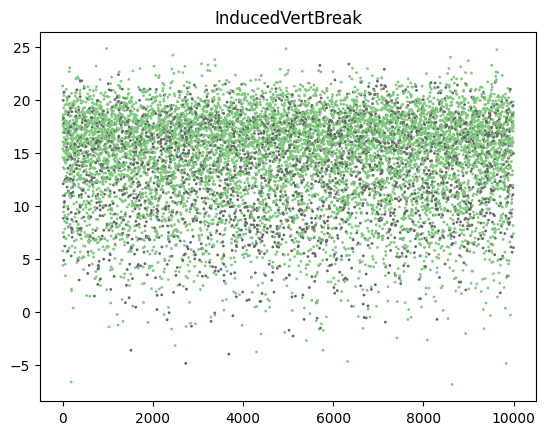

In [4]:
#visualize each variable as scatter plot
for column in trainDF:
    curr_data = trainDF[column]
    plt.scatter(trainDF.index, curr_data, c=trainDF.InPlay, cmap='Accent', s=1)
    plt.title(column)
    plt.show()

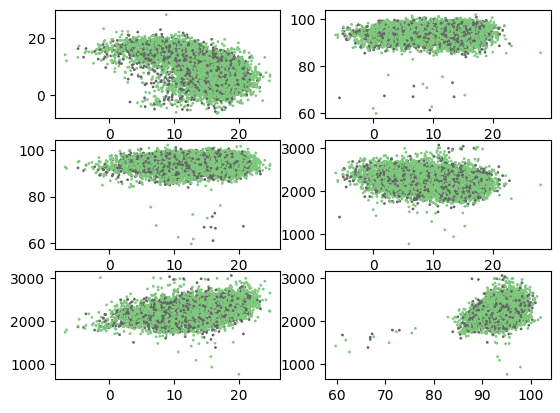

In [5]:
#pairwise scatterplots of each variable, coloured by label
fig, axs = plt.subplots(nrows=3, ncols=2)
axs[0, 0].scatter(trainDF.InducedVertBreak, trainDF.HorzBreak, c=trainDF.InPlay, cmap='Accent', s=1)
axs[1, 0].scatter(trainDF.InducedVertBreak, trainDF.Velo, c=trainDF.InPlay, cmap='Accent', s=1)
axs[2, 0].scatter(trainDF.InducedVertBreak, trainDF.SpinRate, c=trainDF.InPlay, cmap='Accent', s=1)
axs[0, 1].scatter(trainDF.HorzBreak, trainDF.Velo, c=trainDF.InPlay, cmap='Accent', s=1)
axs[1, 1].scatter(trainDF.HorzBreak, trainDF.SpinRate, c=trainDF.InPlay, cmap='Accent', s=1)
axs[2, 1].scatter(trainDF.Velo, trainDF.SpinRate, c=trainDF.InPlay, cmap='Accent', s=1)

plt.show()

Velo
SpinRate
HorzBreak
InducedVertBreak


<ipython-input-6-efa84483748b>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  currDF = pd.DataFrame(trainDF[{column, 'InPlay'}])
<ipython-input-6-efa84483748b>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  currDF = pd.DataFrame(trainDF[{column, 'InPlay'}])
<ipython-input-6-efa84483748b>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  currDF = pd.DataFrame(trainDF[{column, 'InPlay'}])
<ipython-input-6-efa84483748b>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  currDF = pd.DataFrame(trainDF[{column, 'InPlay'}])


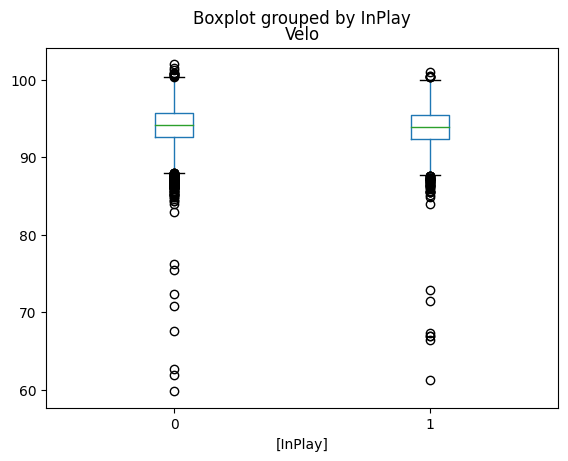

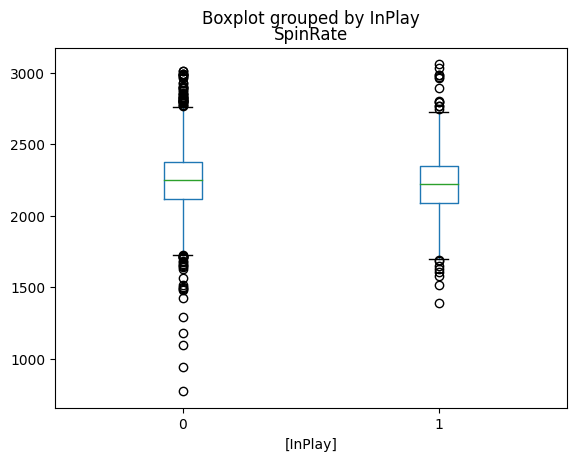

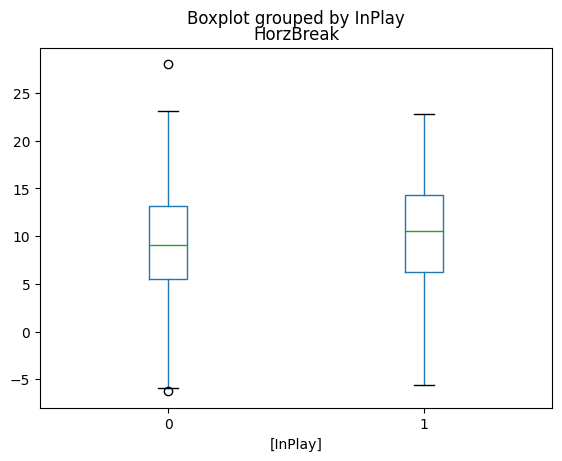

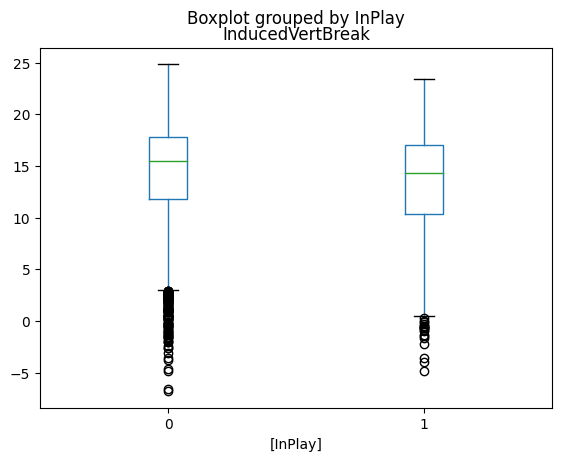

In [6]:
#create boxplot for each variable, separated by label
for column in trainDF:
    if column != 'InPlay':
        print(column)
        currDF = pd.DataFrame(trainDF[{column, 'InPlay'}])
        ax = currDF.boxplot(by='InPlay', grid=False)

In [7]:
#looks like there may be outliers --> very low velocity, remove these
#remove observations with velocity less than 80
trainDF = trainDF.drop(trainDF[trainDF.Velo < 80].index).reset_index(drop=True)
#remove missing values
trainDF = trainDF.dropna().reset_index(drop=True)     

In [8]:
train_data = trainDF[['Velo','SpinRate','HorzBreak','InducedVertBreak']]#.to_numpy()
train_labels = trainDF[['InPlay']]#.to_numpy()

In [9]:
print('Total number of pitches:')
print(len(train_labels))
print('Number of pitches put in play:')
print(sum(train_labels.to_numpy())[0])
#percent of positive labels in training set
print(sum(train_labels.to_numpy())[0]/len(train_labels.to_numpy()))

Total number of pitches:
9979
Number of pitches put in play:
2709
0.27147008718308446


In [10]:
def get_stats(data, variable, labels, label_name):
    data = data[variable]
    data = data[labels['InPlay'].to_numpy()==label_name]
    med_val = np.median(data)
    return med_val

In [11]:
# set height of bar
median_velo0 = get_stats(train_data, 'Velo', train_labels, 0)
median_velo1 = get_stats(train_data,'Velo', train_labels, 1)
median_spin0 = get_stats(train_data, 'SpinRate', train_labels, 0)
median_spin1 = get_stats(train_data,'SpinRate', train_labels, 1)
median_horz0 = get_stats(train_data, 'HorzBreak', train_labels, 0)
median_horz1 = get_stats(train_data,'HorzBreak', train_labels, 1)
median_vert0 = get_stats(train_data, 'InducedVertBreak', train_labels, 0)
median_vert1 = get_stats(train_data,'InducedVertBreak', train_labels, 1)

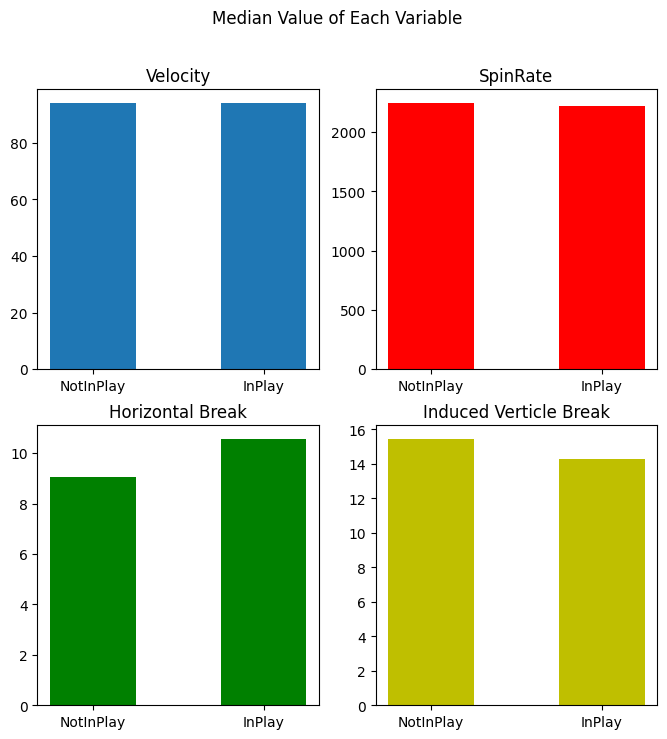

In [12]:
barWidth = 0.5
groups = ['NotInPlay', 'InPlay']
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax0.bar(groups, [median_velo0, median_velo1], width = barWidth)
ax0.set_title('Velocity')
ax1.bar(groups,[median_spin0, median_spin1], color ='r', width = barWidth)
ax1.set_title('SpinRate')
ax2.bar(groups, [median_horz0, median_horz1], color = 'g', width = barWidth)
ax2.set_title('Horizontal Break')
ax3.bar(groups,[median_vert0, median_vert1], color ='y', width = barWidth)
ax3.set_title('Induced Verticle Break')
plt.suptitle('Median Value of Each Variable')
plt.show()